In [34]:
#Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [35]:
#Load the data
ted = pd.read_csv('ted_talks.csv')

In [36]:
#Data overview
ted.dtypes

comments               int64
description           object
duration               int64
event                 object
film_date              int64
languages              int64
main_speaker          object
name                  object
num_speaker            int64
published_date         int64
ratings               object
related_talks         object
speaker_occupation    object
tags                  object
title                 object
url                   object
views                  int64
dtype: object

In [37]:
ted.isna().sum()

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64

#### Checking which talks provoke the most online dicussion.

In [38]:
ted['views_per_comment'] = ted.views / ted.comments

In [39]:
ted[['title', 'views_per_comment']].sort_values('views_per_comment').head(3)

,title,views_per_comment
744,The case for same-sex marriage,450.531587
803,E-voting without fraud,651.739808
96,Militant atheism,683.134291


#### Visualize the distribution of comments.

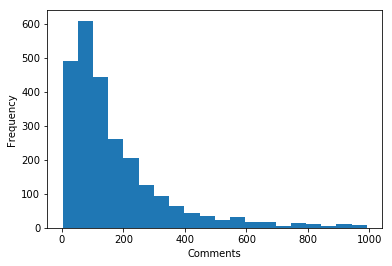

In [40]:
ted.query('comments < 1000').comments.plot(kind='hist', bins = 20)
plt.xlabel('Comments')
plt.show()

#### Plotting the number of talks that took place each year.

In [41]:
ted['ted_datetime'] = pd.to_datetime(ted.film_date, unit='s')
ted['ted_datetime'].sample(5)

793    2010-07-16
425    2009-02-05
1722   2014-03-19
2428   2017-01-26
1077   2011-10-28
Name: ted_datetime, dtype: datetime64[ns]

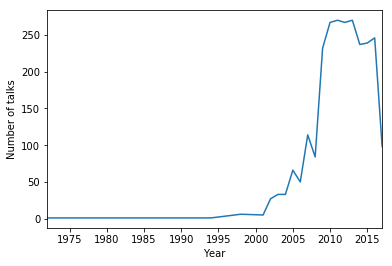

In [42]:
ted['ted_datetime'].dt.year.value_counts().sort_index().plot()
plt.ylabel('Number of talks')
plt.xlabel('Year')
plt.show()

#### What were the "best" events in TED history to attend?

In [43]:
ted.event.value_counts().head(5)

TED2014    84
TED2009    83
TED2013    77
TED2016    77
TED2015    75
Name: event, dtype: int64

In [44]:
ted.groupby('event').views.agg(['count','mean', 'sum']).sort_values('sum').tail()

,count,mean,sum
event,,,
TED2006,45,3.274345e+06,147345533
TED2015,75,2.011017e+06,150826305
TEDGlobal 2013,66,2.584163e+06,170554736
TED2014,84,2.072874e+06,174121423
TED2013,77,2.302700e+06,177307937


#### Unpacking the ratings data.

In [45]:
ted.ratings[0]

"[{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id': 9, 'name': 'Ingenious', 'count': 6073}, {'id': 3, 'name': 'Courageous', 'count': 3253}, {'id': 11, 'name': 'Longwinded', 'count': 387}, {'id': 2, 'name': 'Confusing', 'count': 242}, {'id': 8, 'name': 'Informative', 'count': 7346}, {'id': 22, 'name': 'Fascinating', 'count': 10581}, {'id': 21, 'name': 'Unconvincing', 'count': 300}, {'id': 24, 'name': 'Persuasive', 'count': 10704}, {'id': 23, 'name': 'Jaw-dropping', 'count': 4439}, {'id': 25, 'name': 'OK', 'count': 1174}, {'id': 26, 'name': 'Obnoxious', 'count': 209}, {'id': 10, 'name': 'Inspiring', 'count': 24924}]"

In [46]:
type(ted.ratings[0])

str

In [47]:
import ast

ast.literal_eval(ted.ratings[0])

[{'id': 7, 'name': 'Funny', 'count': 19645},
 {'id': 1, 'name': 'Beautiful', 'count': 4573},
 {'id': 9, 'name': 'Ingenious', 'count': 6073},
 {'id': 3, 'name': 'Courageous', 'count': 3253},
 {'id': 11, 'name': 'Longwinded', 'count': 387},
 {'id': 2, 'name': 'Confusing', 'count': 242},
 {'id': 8, 'name': 'Informative', 'count': 7346},
 {'id': 22, 'name': 'Fascinating', 'count': 10581},
 {'id': 21, 'name': 'Unconvincing', 'count': 300},
 {'id': 24, 'name': 'Persuasive', 'count': 10704},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 4439},
 {'id': 25, 'name': 'OK', 'count': 1174},
 {'id': 26, 'name': 'Obnoxious', 'count': 209},
 {'id': 10, 'name': 'Inspiring', 'count': 24924}]

In [50]:
ted['ratings_list'] = ted.ratings.apply(lambda x: ast.literal_eval(x))

In [53]:
type(ted.ratings_list[0])

list

#### Counting the total number of ratings received by each talk.

In [55]:
ted.ratings_list[0]

[{'id': 7, 'name': 'Funny', 'count': 19645},
 {'id': 1, 'name': 'Beautiful', 'count': 4573},
 {'id': 9, 'name': 'Ingenious', 'count': 6073},
 {'id': 3, 'name': 'Courageous', 'count': 3253},
 {'id': 11, 'name': 'Longwinded', 'count': 387},
 {'id': 2, 'name': 'Confusing', 'count': 242},
 {'id': 8, 'name': 'Informative', 'count': 7346},
 {'id': 22, 'name': 'Fascinating', 'count': 10581},
 {'id': 21, 'name': 'Unconvincing', 'count': 300},
 {'id': 24, 'name': 'Persuasive', 'count': 10704},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 4439},
 {'id': 25, 'name': 'OK', 'count': 1174},
 {'id': 26, 'name': 'Obnoxious', 'count': 209},
 {'id': 10, 'name': 'Inspiring', 'count': 24924}]

In [56]:
def get_num_ratings(list_of_dicts):
    num = 0
    for d in list_of_dicts:
        num = num + d['count']
    return num

In [59]:
get_num_ratings(ted.ratings_list[0])

93850

In [62]:
ted['num_ratings'] = ted.ratings_list.apply(get_num_ratings)